In [1]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/mnist/sisa

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 465, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 465 (delta 14), reused 34 (delta 9), pack-reused 374 (from 3)
Receiving objects: 100% (465/465), 628.99 MiB | 39.82 MiB/s, done.
Resolving deltas: 100% (149/149), done.
Updating files: 100% (69/69), done.
/kaggle/working/machine_unlearning_experiments/experiments/mnist/sisa


## Dependencies

In [2]:
import sys
import json
from pathlib import Path
from torchvision import datasets

## Utils

In [3]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Init model
from models.simple_cnn import init_model_cnn

# Create sisa structure
from methods.sisa.sisa_utils import create_sisa_structure

# Recreate sisa dataloaders from json file
from methods.sisa.sisa_utils import recreate_sisa_dataloaders

# SISA train & test loop
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework

# Aggregate SISA models, via weighted voting
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure


Device used: cuda


## Parameters (arbitrary chosen)

In [5]:
BATCH_SIZE = 64

LEARNING_RATE = 0.001

EPOCHS = 10

SHARDS = 3

SLICES = 5

stt.MULTI_GPU = True

# SISA structure

## Get data transform

In [9]:
*_, transform = init_model_cnn()
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Init model...
Done initializing model.
Model ID: 135688905685216, Optimizer ID: 135689620197280, Criterion ID: 135689620197376


## Load dataset

In [10]:
train_dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)

## Create SISA structure

In [11]:
create_sisa_structure(train_dataset, shards=SHARDS, slices_per_shard=SLICES)

SISA structure saved to sisa_structure.json


In [26]:
sisa_structure_file = 'sisa_structure.json'

## Prepare DataLoaders from json file

In [27]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

# Train using SISA framework

## Models output path

In [28]:
save_models_metrics_dir = './sisa_models'

## Call train

In [36]:
import time
start_time = time.perf_counter()

sisa_train(
    dataloaders=dataloaders, 
    num_epochs=EPOCHS, 
    save_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    learning_rate=LEARNING_RATE,
    )

end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Training shard: shard_0
Init model...
Done initializing model.
Model ID: 132129988203408, Optimizer ID: 132131009992096, Criterion ID: 132131009992144
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.30it/s]


Epoch [1/10], Train Loss: 0.8363, Train Accuracy: 0.7506, Val Loss: 0.2917, Val Accuracy: 0.9125
Epoch 1: New best validation accuracy: 0.9125. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.70it/s]


Epoch [2/10], Train Loss: 0.2173, Train Accuracy: 0.9406, Val Loss: 0.1714, Val Accuracy: 0.9525
Epoch 2: New best validation accuracy: 0.9525. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.14it/s]


Epoch [3/10], Train Loss: 0.1344, Train Accuracy: 0.9611, Val Loss: 0.1911, Val Accuracy: 0.9425


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.24it/s]


Epoch [4/10], Train Loss: 0.0899, Train Accuracy: 0.9728, Val Loss: 0.1325, Val Accuracy: 0.9475


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.49it/s]


Epoch [5/10], Train Loss: 0.0612, Train Accuracy: 0.9831, Val Loss: 0.1221, Val Accuracy: 0.9675
Epoch 5: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.22it/s]


Epoch [6/10], Train Loss: 0.0530, Train Accuracy: 0.9822, Val Loss: 0.1408, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.74it/s]


Epoch [7/10], Train Loss: 0.0325, Train Accuracy: 0.9919, Val Loss: 0.1310, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.48it/s]


Epoch [8/10], Train Loss: 0.0253, Train Accuracy: 0.9928, Val Loss: 0.1360, Val Accuracy: 0.9575


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.77it/s]


Epoch [9/10], Train Loss: 0.0161, Train Accuracy: 0.9969, Val Loss: 0.1461, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 76.26it/s]


Epoch [10/10], Train Loss: 0.0240, Train Accuracy: 0.9931, Val Loss: 0.1279, Val Accuracy: 0.9700
Epoch 10: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.87it/s]


Epoch [1/10], Train Loss: 0.1146, Train Accuracy: 0.9658, Val Loss: 0.0675, Val Accuracy: 0.9800
Epoch 1: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.53it/s]


Epoch [2/10], Train Loss: 0.0542, Train Accuracy: 0.9836, Val Loss: 0.0594, Val Accuracy: 0.9825
Epoch 2: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.01it/s]


Epoch [3/10], Train Loss: 0.0259, Train Accuracy: 0.9928, Val Loss: 0.0395, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 103.32it/s]


Epoch [4/10], Train Loss: 0.0188, Train Accuracy: 0.9956, Val Loss: 0.0505, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.08it/s]


Epoch [5/10], Train Loss: 0.0068, Train Accuracy: 0.9994, Val Loss: 0.0596, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 72.02it/s]


Epoch [6/10], Train Loss: 0.0051, Train Accuracy: 0.9994, Val Loss: 0.0537, Val Accuracy: 0.9850
Epoch 6: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 87.91it/s]


Epoch [7/10], Train Loss: 0.0027, Train Accuracy: 1.0000, Val Loss: 0.0616, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.18it/s]


Epoch [8/10], Train Loss: 0.0019, Train Accuracy: 1.0000, Val Loss: 0.0638, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.22it/s]


Epoch [9/10], Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 0.0635, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.75it/s]


Epoch [10/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0637, Val Accuracy: 0.9775
Training complete for ./sisa_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.62it/s]


Epoch [1/10], Train Loss: 0.1150, Train Accuracy: 0.9678, Val Loss: 0.0765, Val Accuracy: 0.9750
Epoch 1: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.64it/s]


Epoch [2/10], Train Loss: 0.0457, Train Accuracy: 0.9872, Val Loss: 0.0800, Val Accuracy: 0.9725


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.04it/s]


Epoch [3/10], Train Loss: 0.0188, Train Accuracy: 0.9950, Val Loss: 0.0834, Val Accuracy: 0.9725


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.66it/s]


Epoch [4/10], Train Loss: 0.0109, Train Accuracy: 0.9964, Val Loss: 0.0716, Val Accuracy: 0.9800
Epoch 4: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.09it/s]


Epoch [5/10], Train Loss: 0.0036, Train Accuracy: 0.9997, Val Loss: 0.0716, Val Accuracy: 0.9825
Epoch 5: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.96it/s]


Epoch [6/10], Train Loss: 0.0030, Train Accuracy: 0.9997, Val Loss: 0.0701, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.99it/s]


Epoch [7/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.0712, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.97it/s]


Epoch [8/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0758, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.14it/s]


Epoch [9/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0757, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.25it/s]


Epoch [10/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0768, Val Accuracy: 0.9825
Training complete for ./sisa_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 80.18it/s]


Epoch [1/10], Train Loss: 0.0931, Train Accuracy: 0.9753, Val Loss: 0.0571, Val Accuracy: 0.9850
Epoch 1: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.37it/s]


Epoch [2/10], Train Loss: 0.0255, Train Accuracy: 0.9914, Val Loss: 0.0672, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.03it/s]


Epoch [3/10], Train Loss: 0.0193, Train Accuracy: 0.9939, Val Loss: 0.0733, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.13it/s]


Epoch [4/10], Train Loss: 0.0042, Train Accuracy: 0.9994, Val Loss: 0.0530, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 103.37it/s]


Epoch [5/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0495, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.73it/s]


Epoch [6/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0503, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 89.69it/s]


Epoch [7/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0503, Val Accuracy: 0.9875
Epoch 7: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.51it/s]


Epoch [8/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0501, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.69it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0508, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.36it/s]


Epoch [10/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0510, Val Accuracy: 0.9850
Training complete for ./sisa_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.49it/s]


Epoch [1/10], Train Loss: 0.0840, Train Accuracy: 0.9769, Val Loss: 0.0563, Val Accuracy: 0.9800
Epoch 1: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.27it/s]


Epoch [2/10], Train Loss: 0.0257, Train Accuracy: 0.9917, Val Loss: 0.0644, Val Accuracy: 0.9850
Epoch 2: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.50it/s]


Epoch [3/10], Train Loss: 0.0130, Train Accuracy: 0.9961, Val Loss: 0.0484, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.22it/s]


Epoch [4/10], Train Loss: 0.0049, Train Accuracy: 0.9992, Val Loss: 0.0614, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.09it/s]


Epoch [5/10], Train Loss: 0.0023, Train Accuracy: 0.9994, Val Loss: 0.0616, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.60it/s]


Epoch [6/10], Train Loss: 0.0017, Train Accuracy: 0.9994, Val Loss: 0.0656, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.13it/s]


Epoch [7/10], Train Loss: 0.0012, Train Accuracy: 0.9997, Val Loss: 0.0708, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.78it/s]


Epoch [8/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0699, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.77it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0711, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.75it/s]


Epoch [10/10], Train Loss: 0.0002, Train Accuracy: 1.0000, Val Loss: 0.0714, Val Accuracy: 0.9850
Training complete for ./sisa_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_0_final_model.pth
Training shard: shard_1
Init model...
Done initializing model.
Model ID: 132130241332272, Optimizer ID: 132129988204848, Criterion ID: 132129988209600
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.93it/s]


Epoch [1/10], Train Loss: 0.9445, Train Accuracy: 0.7131, Val Loss: 0.3399, Val Accuracy: 0.9125
Epoch 1: New best validation accuracy: 0.9125. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.60it/s]


Epoch [2/10], Train Loss: 0.2489, Train Accuracy: 0.9303, Val Loss: 0.1803, Val Accuracy: 0.9400
Epoch 2: New best validation accuracy: 0.9400. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.06it/s]


Epoch [3/10], Train Loss: 0.1573, Train Accuracy: 0.9533, Val Loss: 0.1320, Val Accuracy: 0.9550
Epoch 3: New best validation accuracy: 0.9550. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.21it/s]


Epoch [4/10], Train Loss: 0.1085, Train Accuracy: 0.9689, Val Loss: 0.1414, Val Accuracy: 0.9500


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 89.51it/s]


Epoch [5/10], Train Loss: 0.0850, Train Accuracy: 0.9772, Val Loss: 0.1530, Val Accuracy: 0.9450


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.97it/s]


Epoch [6/10], Train Loss: 0.0609, Train Accuracy: 0.9839, Val Loss: 0.1041, Val Accuracy: 0.9650
Epoch 6: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.22it/s]


Epoch [7/10], Train Loss: 0.0570, Train Accuracy: 0.9839, Val Loss: 0.1017, Val Accuracy: 0.9575


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.29it/s]


Epoch [8/10], Train Loss: 0.0358, Train Accuracy: 0.9900, Val Loss: 0.0949, Val Accuracy: 0.9700
Epoch 8: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.89it/s]


Epoch [9/10], Train Loss: 0.0217, Train Accuracy: 0.9961, Val Loss: 0.1014, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 89.52it/s]


Epoch [10/10], Train Loss: 0.0161, Train Accuracy: 0.9978, Val Loss: 0.1010, Val Accuracy: 0.9575
Training complete for ./sisa_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.51it/s]


Epoch [1/10], Train Loss: 0.1077, Train Accuracy: 0.9639, Val Loss: 0.1527, Val Accuracy: 0.9475
Epoch 1: New best validation accuracy: 0.9475. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.32it/s]


Epoch [2/10], Train Loss: 0.0514, Train Accuracy: 0.9825, Val Loss: 0.1073, Val Accuracy: 0.9575
Epoch 2: New best validation accuracy: 0.9575. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.49it/s]


Epoch [3/10], Train Loss: 0.0245, Train Accuracy: 0.9919, Val Loss: 0.1132, Val Accuracy: 0.9625
Epoch 3: New best validation accuracy: 0.9625. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 88.43it/s]


Epoch [4/10], Train Loss: 0.0219, Train Accuracy: 0.9933, Val Loss: 0.1351, Val Accuracy: 0.9600


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.34it/s]


Epoch [5/10], Train Loss: 0.0092, Train Accuracy: 0.9986, Val Loss: 0.1044, Val Accuracy: 0.9675
Epoch 5: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.81it/s]


Epoch [6/10], Train Loss: 0.0075, Train Accuracy: 0.9981, Val Loss: 0.1155, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.82it/s]


Epoch [7/10], Train Loss: 0.0040, Train Accuracy: 1.0000, Val Loss: 0.1075, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 85.71it/s]


Epoch [8/10], Train Loss: 0.0018, Train Accuracy: 1.0000, Val Loss: 0.1113, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.44it/s]


Epoch [9/10], Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 0.1118, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.55it/s]


Epoch [10/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.1085, Val Accuracy: 0.9675
Training complete for ./sisa_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.98it/s]


Epoch [1/10], Train Loss: 0.1009, Train Accuracy: 0.9683, Val Loss: 0.0833, Val Accuracy: 0.9700
Epoch 1: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.62it/s]


Epoch [2/10], Train Loss: 0.0396, Train Accuracy: 0.9881, Val Loss: 0.0620, Val Accuracy: 0.9750
Epoch 2: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.47it/s]


Epoch [3/10], Train Loss: 0.0267, Train Accuracy: 0.9911, Val Loss: 0.0635, Val Accuracy: 0.9800
Epoch 3: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.66it/s]


Epoch [4/10], Train Loss: 0.0135, Train Accuracy: 0.9956, Val Loss: 0.0571, Val Accuracy: 0.9850
Epoch 4: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.89it/s]


Epoch [5/10], Train Loss: 0.0073, Train Accuracy: 0.9986, Val Loss: 0.0571, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.19it/s]


Epoch [6/10], Train Loss: 0.0036, Train Accuracy: 1.0000, Val Loss: 0.0622, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 106.14it/s]


Epoch [7/10], Train Loss: 0.0018, Train Accuracy: 1.0000, Val Loss: 0.0544, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.05it/s]


Epoch [8/10], Train Loss: 0.0018, Train Accuracy: 0.9997, Val Loss: 0.0521, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.36it/s]


Epoch [9/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0578, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.21it/s]


Epoch [10/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0564, Val Accuracy: 0.9800
Training complete for ./sisa_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 78.92it/s]


Epoch [1/10], Train Loss: 0.0889, Train Accuracy: 0.9703, Val Loss: 0.0470, Val Accuracy: 0.9850
Epoch 1: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.10it/s]


Epoch [2/10], Train Loss: 0.0317, Train Accuracy: 0.9886, Val Loss: 0.0418, Val Accuracy: 0.9925
Epoch 2: New best validation accuracy: 0.9925. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.34it/s]


Epoch [3/10], Train Loss: 0.0120, Train Accuracy: 0.9972, Val Loss: 0.0333, Val Accuracy: 0.9950
Epoch 3: New best validation accuracy: 0.9950. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.74it/s]


Epoch [4/10], Train Loss: 0.0097, Train Accuracy: 0.9975, Val Loss: 0.0334, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.69it/s]


Epoch [5/10], Train Loss: 0.0043, Train Accuracy: 0.9989, Val Loss: 0.0342, Val Accuracy: 0.9900


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.00it/s]


Epoch [6/10], Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 0.0330, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.08it/s]


Epoch [7/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.0334, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.89it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0352, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.10it/s]


Epoch [9/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0353, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.31it/s]


Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0368, Val Accuracy: 0.9925
Training complete for ./sisa_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.73it/s]


Epoch [1/10], Train Loss: 0.0830, Train Accuracy: 0.9786, Val Loss: 0.0858, Val Accuracy: 0.9850
Epoch 1: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.39it/s]


Epoch [2/10], Train Loss: 0.0264, Train Accuracy: 0.9908, Val Loss: 0.1415, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.11it/s]


Epoch [3/10], Train Loss: 0.0148, Train Accuracy: 0.9944, Val Loss: 0.1232, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.25it/s]


Epoch [4/10], Train Loss: 0.0054, Train Accuracy: 0.9986, Val Loss: 0.0917, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.21it/s]


Epoch [5/10], Train Loss: 0.0024, Train Accuracy: 0.9992, Val Loss: 0.0979, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.75it/s]


Epoch [6/10], Train Loss: 0.0013, Train Accuracy: 0.9997, Val Loss: 0.1023, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.82it/s]


Epoch [7/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1125, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.62it/s]


Epoch [8/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.1137, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 105.90it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.1174, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.78it/s]


Epoch [10/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.1177, Val Accuracy: 0.9825
Training complete for ./sisa_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_1_final_model.pth
Training shard: shard_2
Init model...
Done initializing model.
Model ID: 132129975770928, Optimizer ID: 132130042512336, Criterion ID: 132130042511952
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.95it/s]


Epoch [1/10], Train Loss: 0.9272, Train Accuracy: 0.7128, Val Loss: 0.3538, Val Accuracy: 0.8875
Epoch 1: New best validation accuracy: 0.8875. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.45it/s]


Epoch [2/10], Train Loss: 0.2597, Train Accuracy: 0.9197, Val Loss: 0.2400, Val Accuracy: 0.9150
Epoch 2: New best validation accuracy: 0.9150. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 103.62it/s]


Epoch [3/10], Train Loss: 0.1559, Train Accuracy: 0.9567, Val Loss: 0.1408, Val Accuracy: 0.9475
Epoch 3: New best validation accuracy: 0.9475. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.87it/s]


Epoch [4/10], Train Loss: 0.0984, Train Accuracy: 0.9719, Val Loss: 0.1076, Val Accuracy: 0.9650
Epoch 4: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.25it/s]


Epoch [5/10], Train Loss: 0.0628, Train Accuracy: 0.9850, Val Loss: 0.0885, Val Accuracy: 0.9600


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.94it/s]


Epoch [6/10], Train Loss: 0.0629, Train Accuracy: 0.9808, Val Loss: 0.1229, Val Accuracy: 0.9575


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.03it/s]


Epoch [7/10], Train Loss: 0.0450, Train Accuracy: 0.9869, Val Loss: 0.1001, Val Accuracy: 0.9700
Epoch 7: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.67it/s]


Epoch [8/10], Train Loss: 0.0283, Train Accuracy: 0.9939, Val Loss: 0.0852, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.08it/s]


Epoch [9/10], Train Loss: 0.0259, Train Accuracy: 0.9939, Val Loss: 0.0734, Val Accuracy: 0.9800
Epoch 9: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.76it/s]


Epoch [10/10], Train Loss: 0.0142, Train Accuracy: 0.9964, Val Loss: 0.0747, Val Accuracy: 0.9775
Training complete for ./sisa_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.41it/s]


Epoch [1/10], Train Loss: 0.1231, Train Accuracy: 0.9614, Val Loss: 0.1628, Val Accuracy: 0.9550
Epoch 1: New best validation accuracy: 0.9550. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.08it/s]


Epoch [2/10], Train Loss: 0.0520, Train Accuracy: 0.9833, Val Loss: 0.0989, Val Accuracy: 0.9675
Epoch 2: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.50it/s]


Epoch [3/10], Train Loss: 0.0296, Train Accuracy: 0.9914, Val Loss: 0.0949, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.17it/s]


Epoch [4/10], Train Loss: 0.0185, Train Accuracy: 0.9947, Val Loss: 0.0995, Val Accuracy: 0.9700
Epoch 4: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.68it/s]


Epoch [5/10], Train Loss: 0.0094, Train Accuracy: 0.9986, Val Loss: 0.1132, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.20it/s]


Epoch [6/10], Train Loss: 0.0051, Train Accuracy: 0.9992, Val Loss: 0.1039, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.33it/s]


Epoch [7/10], Train Loss: 0.0030, Train Accuracy: 1.0000, Val Loss: 0.1084, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.05it/s]


Epoch [8/10], Train Loss: 0.0020, Train Accuracy: 1.0000, Val Loss: 0.1053, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.31it/s]


Epoch [9/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.1093, Val Accuracy: 0.9725
Epoch 9: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.30it/s]


Epoch [10/10], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.1115, Val Accuracy: 0.9725
Training complete for ./sisa_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.21it/s]


Epoch [1/10], Train Loss: 0.1095, Train Accuracy: 0.9744, Val Loss: 0.0901, Val Accuracy: 0.9700
Epoch 1: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.19it/s]


Epoch [2/10], Train Loss: 0.0380, Train Accuracy: 0.9878, Val Loss: 0.1059, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 85.83it/s]


Epoch [3/10], Train Loss: 0.0184, Train Accuracy: 0.9942, Val Loss: 0.0907, Val Accuracy: 0.9725
Epoch 3: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.59it/s]


Epoch [4/10], Train Loss: 0.0077, Train Accuracy: 0.9986, Val Loss: 0.0938, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.43it/s]


Epoch [5/10], Train Loss: 0.0057, Train Accuracy: 0.9986, Val Loss: 0.0882, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.13it/s]


Epoch [6/10], Train Loss: 0.0022, Train Accuracy: 0.9997, Val Loss: 0.0892, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.75it/s]


Epoch [7/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0863, Val Accuracy: 0.9725


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.59it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0933, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.53it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0909, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.97it/s]


Epoch [10/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0927, Val Accuracy: 0.9675
Training complete for ./sisa_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.25it/s]


Epoch [1/10], Train Loss: 0.1190, Train Accuracy: 0.9647, Val Loss: 0.1122, Val Accuracy: 0.9775
Epoch 1: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.60it/s]


Epoch [2/10], Train Loss: 0.0461, Train Accuracy: 0.9844, Val Loss: 0.1054, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.18it/s]


Epoch [3/10], Train Loss: 0.0148, Train Accuracy: 0.9958, Val Loss: 0.1033, Val Accuracy: 0.9800
Epoch 3: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.35it/s]


Epoch [4/10], Train Loss: 0.0051, Train Accuracy: 0.9994, Val Loss: 0.0837, Val Accuracy: 0.9825
Epoch 4: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.60it/s]


Epoch [5/10], Train Loss: 0.0019, Train Accuracy: 1.0000, Val Loss: 0.1048, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.73it/s]


Epoch [6/10], Train Loss: 0.0010, Train Accuracy: 1.0000, Val Loss: 0.0962, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.86it/s]


Epoch [7/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0959, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.08it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.1025, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.54it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1046, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.99it/s]


Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.1036, Val Accuracy: 0.9825
Training complete for ./sisa_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.60it/s]


Epoch [1/10], Train Loss: 0.0983, Train Accuracy: 0.9689, Val Loss: 0.0741, Val Accuracy: 0.9800
Epoch 1: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.09it/s]


Epoch [2/10], Train Loss: 0.0181, Train Accuracy: 0.9939, Val Loss: 0.0429, Val Accuracy: 0.9875
Epoch 2: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 83.25it/s]


Epoch [3/10], Train Loss: 0.0060, Train Accuracy: 0.9989, Val Loss: 0.0573, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 81.01it/s]


Epoch [4/10], Train Loss: 0.0062, Train Accuracy: 0.9981, Val Loss: 0.0486, Val Accuracy: 0.9900
Epoch 4: New best validation accuracy: 0.9900. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.74it/s]


Epoch [5/10], Train Loss: 0.0019, Train Accuracy: 0.9997, Val Loss: 0.0352, Val Accuracy: 0.9950
Epoch 5: New best validation accuracy: 0.9950. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 86.46it/s]


Epoch [6/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0324, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.44it/s]


Epoch [7/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0327, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.10it/s]


Epoch [8/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0330, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.61it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0327, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.32it/s]


Epoch [10/10], Train Loss: 0.0002, Train Accuracy: 1.0000, Val Loss: 0.0349, Val Accuracy: 0.9925
Training complete for ./sisa_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_2_final_model.pth
Execution time: 146.533880 seconds


## Call test

In [37]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 132129988205376, Optimizer ID: 132129999040192, Criterion ID: 132129999040960
Loading and testing model: ./sisa_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_models/shard_0_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 90.41it/s]


Predictions and labels saved to ./sisa_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 132130042518528, Optimizer ID: 132130042512288, Criterion ID: 132130042517856
Loading and testing model: ./sisa_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_models/shard_1_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 90.11it/s]


Predictions and labels saved to ./sisa_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 132130304638928, Optimizer ID: 132130042518192, Criterion ID: 132130042518048
Loading and testing model: ./sisa_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_models/shard_2_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 90.88it/s]

Predictions and labels saved to ./sisa_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [38]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9853
  Precision: 0.9853
  Recall: 0.9853
  F1 Score: 0.9853
Shard shard_1 Metrics:
  Accuracy: 0.9868
  Precision: 0.9868
  Recall: 0.9868
  F1 Score: 0.9868
Shard shard_2 Metrics:
  Accuracy: 0.9869
  Precision: 0.9869
  Recall: 0.9869
  F1 Score: 0.9869

Aggregated Model Metrics:
  Accuracy: 0.9891
  Precision: 0.9891
  Recall: 0.9891
  F1 Score: 0.9891


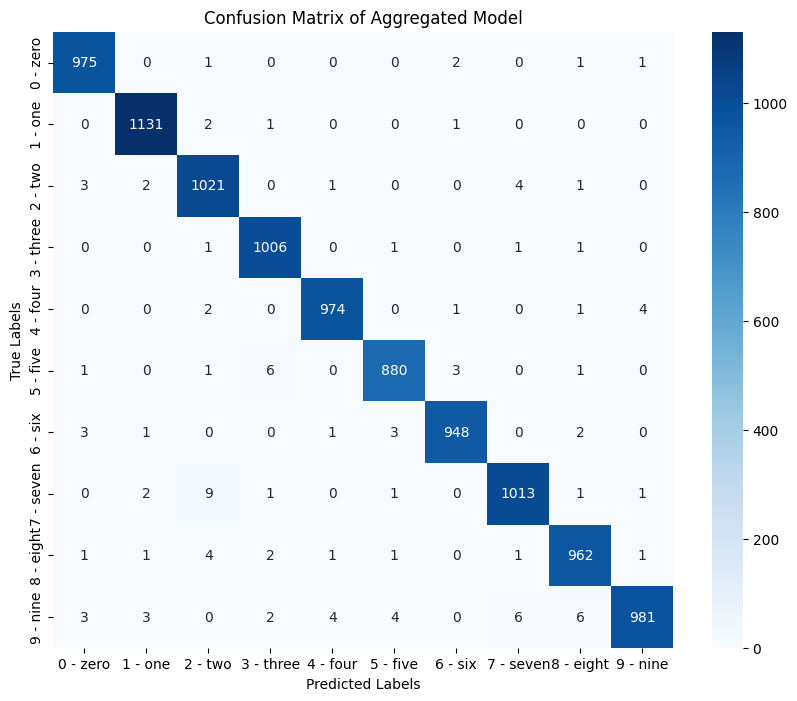

In [39]:
evaluate_aggregated_model(results, classes)

# SISA re-train

## Paths to data info

In [7]:
mnist_samples_to_delete = Path("..") / 'naive' / 'mnist_samples_to_unlearn_30per.json'
mnist_sisa_structure = 'sisa_structure.json'
updated_sisa_structure = 'updated_sisa_strucute.json'
deleted_samples = 'deleted_samples.json'

## Update sisa structure -> delete samples 

In [12]:
affected_shards = update_sisa_structure(mnist_samples_to_delete, mnist_sisa_structure, updated_sisa_structure,deleted_samples)

Retraining Plan:
  Shard: shard_0, Start from Slice: slice_0 onward
  Shard: shard_1, Start from Slice: slice_0 onward
  Shard: shard_2, Start from Slice: slice_0 onward


## Recreate DataLoaders from json file

In [13]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

## Models output path

In [14]:
save_path = "./sisa_updated_models"

## Retrain the affected shards

In [15]:
import time
start_time = time.perf_counter()

retrain_sisa_framework(
    dataloaders=dataloaders,
    affected_shards=affected_shards,
    num_epochs=EPOCHS,
    save_models_metrics_dir=save_path,
    init_model_func=init_model_cnn, 
    learning_rate=LEARNING_RATE
)

end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Retraining shard: shard_0
Init model...
Done initializing model.
Model ID: 135688915753840, Optimizer ID: 135688905798752, Criterion ID: 135688905935264
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 80.41it/s]


Epoch [1/10], Train Loss: 1.2482, Train Accuracy: 0.6213, Val Loss: 0.5162, Val Accuracy: 0.8149
Epoch 1: New best validation accuracy: 0.8149. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 80.10it/s]


Epoch [2/10], Train Loss: 0.3094, Train Accuracy: 0.9081, Val Loss: 0.2991, Val Accuracy: 0.9075
Epoch 2: New best validation accuracy: 0.9075. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.99it/s]


Epoch [3/10], Train Loss: 0.1886, Train Accuracy: 0.9381, Val Loss: 0.1961, Val Accuracy: 0.9466
Epoch 3: New best validation accuracy: 0.9466. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.39it/s]


Epoch [4/10], Train Loss: 0.1205, Train Accuracy: 0.9661, Val Loss: 0.1958, Val Accuracy: 0.9359


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 87.64it/s]


Epoch [5/10], Train Loss: 0.0784, Train Accuracy: 0.9791, Val Loss: 0.1712, Val Accuracy: 0.9573
Epoch 5: New best validation accuracy: 0.9573. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.64it/s]


Epoch [6/10], Train Loss: 0.0632, Train Accuracy: 0.9826, Val Loss: 0.1846, Val Accuracy: 0.9537


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.83it/s]


Epoch [7/10], Train Loss: 0.0542, Train Accuracy: 0.9815, Val Loss: 0.2008, Val Accuracy: 0.9466


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.07it/s]


Epoch [8/10], Train Loss: 0.0378, Train Accuracy: 0.9893, Val Loss: 0.1542, Val Accuracy: 0.9573


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.79it/s]


Epoch [9/10], Train Loss: 0.0317, Train Accuracy: 0.9905, Val Loss: 0.1585, Val Accuracy: 0.9715
Epoch 9: New best validation accuracy: 0.9715. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.39it/s]


Epoch [10/10], Train Loss: 0.0307, Train Accuracy: 0.9913, Val Loss: 0.1431, Val Accuracy: 0.9751
Epoch 10: New best validation accuracy: 0.9751. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 78.55it/s]


Epoch [1/10], Train Loss: 0.1710, Train Accuracy: 0.9452, Val Loss: 0.1429, Val Accuracy: 0.9534
Epoch 1: New best validation accuracy: 0.9534. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.30it/s]


Epoch [2/10], Train Loss: 0.0690, Train Accuracy: 0.9758, Val Loss: 0.1108, Val Accuracy: 0.9713
Epoch 2: New best validation accuracy: 0.9713. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.62it/s]


Epoch [3/10], Train Loss: 0.0437, Train Accuracy: 0.9877, Val Loss: 0.1119, Val Accuracy: 0.9713


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.52it/s]


Epoch [4/10], Train Loss: 0.0222, Train Accuracy: 0.9944, Val Loss: 0.1390, Val Accuracy: 0.9606


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.39it/s]


Epoch [5/10], Train Loss: 0.0140, Train Accuracy: 0.9976, Val Loss: 0.1313, Val Accuracy: 0.9713


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 106.96it/s]


Epoch [6/10], Train Loss: 0.0091, Train Accuracy: 0.9984, Val Loss: 0.1260, Val Accuracy: 0.9749
Epoch 6: New best validation accuracy: 0.9749. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.02it/s]


Epoch [7/10], Train Loss: 0.0047, Train Accuracy: 1.0000, Val Loss: 0.1340, Val Accuracy: 0.9749


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.97it/s]


Epoch [8/10], Train Loss: 0.0036, Train Accuracy: 1.0000, Val Loss: 0.1201, Val Accuracy: 0.9785
Epoch 8: New best validation accuracy: 0.9785. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 96.08it/s]


Epoch [9/10], Train Loss: 0.0028, Train Accuracy: 1.0000, Val Loss: 0.1429, Val Accuracy: 0.9713


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 98.74it/s]


Epoch [10/10], Train Loss: 0.0017, Train Accuracy: 1.0000, Val Loss: 0.1402, Val Accuracy: 0.9677
Training complete for ./sisa_updated_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 86.98it/s]


Epoch [1/10], Train Loss: 0.1571, Train Accuracy: 0.9537, Val Loss: 0.0779, Val Accuracy: 0.9748
Epoch 1: New best validation accuracy: 0.9748. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.01it/s]


Epoch [2/10], Train Loss: 0.0566, Train Accuracy: 0.9820, Val Loss: 0.0595, Val Accuracy: 0.9748


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 96.44it/s]


Epoch [3/10], Train Loss: 0.0230, Train Accuracy: 0.9932, Val Loss: 0.0537, Val Accuracy: 0.9748


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.02it/s]


Epoch [4/10], Train Loss: 0.0111, Train Accuracy: 0.9980, Val Loss: 0.0469, Val Accuracy: 0.9820
Epoch 4: New best validation accuracy: 0.9820. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.44it/s]


Epoch [5/10], Train Loss: 0.0063, Train Accuracy: 0.9988, Val Loss: 0.0528, Val Accuracy: 0.9784


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 99.72it/s]


Epoch [6/10], Train Loss: 0.0036, Train Accuracy: 1.0000, Val Loss: 0.0596, Val Accuracy: 0.9820


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.69it/s]


Epoch [7/10], Train Loss: 0.0024, Train Accuracy: 1.0000, Val Loss: 0.0524, Val Accuracy: 0.9820


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.75it/s]


Epoch [8/10], Train Loss: 0.0020, Train Accuracy: 1.0000, Val Loss: 0.0540, Val Accuracy: 0.9784


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 98.36it/s]


Epoch [9/10], Train Loss: 0.0015, Train Accuracy: 1.0000, Val Loss: 0.0476, Val Accuracy: 0.9784


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.84it/s]


Epoch [10/10], Train Loss: 0.0013, Train Accuracy: 1.0000, Val Loss: 0.0549, Val Accuracy: 0.9748
Training complete for ./sisa_updated_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.86it/s]


Epoch [1/10], Train Loss: 0.0841, Train Accuracy: 0.9742, Val Loss: 0.1423, Val Accuracy: 0.9607
Epoch 1: New best validation accuracy: 0.9607. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.89it/s]


Epoch [2/10], Train Loss: 0.0346, Train Accuracy: 0.9913, Val Loss: 0.1315, Val Accuracy: 0.9643
Epoch 2: New best validation accuracy: 0.9643. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.71it/s]


Epoch [3/10], Train Loss: 0.0150, Train Accuracy: 0.9964, Val Loss: 0.1543, Val Accuracy: 0.9679
Epoch 3: New best validation accuracy: 0.9679. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.67it/s]


Epoch [4/10], Train Loss: 0.0059, Train Accuracy: 0.9980, Val Loss: 0.1409, Val Accuracy: 0.9750
Epoch 4: New best validation accuracy: 0.9750. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.47it/s]


Epoch [5/10], Train Loss: 0.0032, Train Accuracy: 0.9996, Val Loss: 0.1309, Val Accuracy: 0.9786
Epoch 5: New best validation accuracy: 0.9786. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.94it/s]


Epoch [6/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.1438, Val Accuracy: 0.9786


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.96it/s]


Epoch [7/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.1502, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.01it/s]


Epoch [8/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.1522, Val Accuracy: 0.9786


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.78it/s]


Epoch [9/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.1562, Val Accuracy: 0.9786


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.29it/s]


Epoch [10/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1607, Val Accuracy: 0.9786
Training complete for ./sisa_updated_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.03it/s]


Epoch [1/10], Train Loss: 0.1182, Train Accuracy: 0.9697, Val Loss: 0.0876, Val Accuracy: 0.9787
Epoch 1: New best validation accuracy: 0.9787. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.27it/s]


Epoch [2/10], Train Loss: 0.0348, Train Accuracy: 0.9890, Val Loss: 0.1108, Val Accuracy: 0.9787


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.66it/s]


Epoch [3/10], Train Loss: 0.0142, Train Accuracy: 0.9969, Val Loss: 0.1150, Val Accuracy: 0.9823
Epoch 3: New best validation accuracy: 0.9823. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.51it/s]


Epoch [4/10], Train Loss: 0.0065, Train Accuracy: 0.9984, Val Loss: 0.1127, Val Accuracy: 0.9858
Epoch 4: New best validation accuracy: 0.9858. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.77it/s]


Epoch [5/10], Train Loss: 0.0041, Train Accuracy: 0.9996, Val Loss: 0.1184, Val Accuracy: 0.9894
Epoch 5: New best validation accuracy: 0.9894. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.37it/s]


Epoch [6/10], Train Loss: 0.0016, Train Accuracy: 1.0000, Val Loss: 0.1187, Val Accuracy: 0.9894


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.66it/s]


Epoch [7/10], Train Loss: 0.0010, Train Accuracy: 1.0000, Val Loss: 0.1209, Val Accuracy: 0.9894


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.32it/s]


Epoch [8/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.1228, Val Accuracy: 0.9894


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.64it/s]


Epoch [9/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.1250, Val Accuracy: 0.9894


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.39it/s]


Epoch [10/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.1279, Val Accuracy: 0.9894
Training complete for ./sisa_updated_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_0 to ./sisa_updated_models/shard_0_final_model.pth
Retraining shard: shard_1
Init model...
Done initializing model.
Model ID: 135688904965472, Optimizer ID: 135688905036880, Criterion ID: 135688905038080
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.43it/s]


Epoch [1/10], Train Loss: 1.1749, Train Accuracy: 0.6462, Val Loss: 0.4781, Val Accuracy: 0.8244
Epoch 1: New best validation accuracy: 0.8244. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.31it/s]


Epoch [2/10], Train Loss: 0.3413, Train Accuracy: 0.8957, Val Loss: 0.2725, Val Accuracy: 0.9247
Epoch 2: New best validation accuracy: 0.9247. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.39it/s]


Epoch [3/10], Train Loss: 0.1842, Train Accuracy: 0.9463, Val Loss: 0.2155, Val Accuracy: 0.9247


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.14it/s]


Epoch [4/10], Train Loss: 0.1488, Train Accuracy: 0.9606, Val Loss: 0.1653, Val Accuracy: 0.9498
Epoch 4: New best validation accuracy: 0.9498. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.11it/s]


Epoch [5/10], Train Loss: 0.0908, Train Accuracy: 0.9745, Val Loss: 0.1419, Val Accuracy: 0.9427


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.52it/s]


Epoch [6/10], Train Loss: 0.0750, Train Accuracy: 0.9773, Val Loss: 0.1809, Val Accuracy: 0.9427


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.26it/s]


Epoch [7/10], Train Loss: 0.0657, Train Accuracy: 0.9797, Val Loss: 0.1276, Val Accuracy: 0.9606
Epoch 7: New best validation accuracy: 0.9606. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 96.23it/s]


Epoch [8/10], Train Loss: 0.0425, Train Accuracy: 0.9877, Val Loss: 0.1117, Val Accuracy: 0.9606


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.26it/s]


Epoch [9/10], Train Loss: 0.0270, Train Accuracy: 0.9936, Val Loss: 0.1253, Val Accuracy: 0.9606


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.08it/s]


Epoch [10/10], Train Loss: 0.0195, Train Accuracy: 0.9964, Val Loss: 0.0965, Val Accuracy: 0.9677
Epoch 10: New best validation accuracy: 0.9677. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.13it/s]


Epoch [1/10], Train Loss: 0.1387, Train Accuracy: 0.9592, Val Loss: 0.1116, Val Accuracy: 0.9679
Epoch 1: New best validation accuracy: 0.9679. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.07it/s]


Epoch [2/10], Train Loss: 0.0640, Train Accuracy: 0.9806, Val Loss: 0.0961, Val Accuracy: 0.9679


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.39it/s]


Epoch [3/10], Train Loss: 0.0409, Train Accuracy: 0.9873, Val Loss: 0.0991, Val Accuracy: 0.9679


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.97it/s]


Epoch [4/10], Train Loss: 0.0288, Train Accuracy: 0.9909, Val Loss: 0.0785, Val Accuracy: 0.9750
Epoch 4: New best validation accuracy: 0.9750. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.41it/s]


Epoch [5/10], Train Loss: 0.0137, Train Accuracy: 0.9980, Val Loss: 0.1014, Val Accuracy: 0.9714


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.24it/s]


Epoch [6/10], Train Loss: 0.0092, Train Accuracy: 0.9988, Val Loss: 0.1005, Val Accuracy: 0.9679


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.53it/s]


Epoch [7/10], Train Loss: 0.0066, Train Accuracy: 0.9996, Val Loss: 0.0869, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.24it/s]


Epoch [8/10], Train Loss: 0.0040, Train Accuracy: 1.0000, Val Loss: 0.0847, Val Accuracy: 0.9714


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.56it/s]


Epoch [9/10], Train Loss: 0.0027, Train Accuracy: 1.0000, Val Loss: 0.0840, Val Accuracy: 0.9714


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.97it/s]


Epoch [10/10], Train Loss: 0.0021, Train Accuracy: 1.0000, Val Loss: 0.0888, Val Accuracy: 0.9714
Training complete for ./sisa_updated_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.47it/s]


Epoch [1/10], Train Loss: 0.1361, Train Accuracy: 0.9607, Val Loss: 0.0808, Val Accuracy: 0.9672
Epoch 1: New best validation accuracy: 0.9672. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 108.04it/s]


Epoch [2/10], Train Loss: 0.0478, Train Accuracy: 0.9870, Val Loss: 0.0555, Val Accuracy: 0.9781
Epoch 2: New best validation accuracy: 0.9781. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 106.50it/s]


Epoch [3/10], Train Loss: 0.0426, Train Accuracy: 0.9903, Val Loss: 0.0649, Val Accuracy: 0.9672


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.15it/s]


Epoch [4/10], Train Loss: 0.0132, Train Accuracy: 0.9976, Val Loss: 0.0375, Val Accuracy: 0.9854
Epoch 4: New best validation accuracy: 0.9854. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 81.37it/s]


Epoch [5/10], Train Loss: 0.0053, Train Accuracy: 0.9996, Val Loss: 0.0397, Val Accuracy: 0.9818


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 60.12it/s]


Epoch [6/10], Train Loss: 0.0028, Train Accuracy: 1.0000, Val Loss: 0.0554, Val Accuracy: 0.9781


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 108.35it/s]


Epoch [7/10], Train Loss: 0.0020, Train Accuracy: 1.0000, Val Loss: 0.0472, Val Accuracy: 0.9745


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.30it/s]


Epoch [8/10], Train Loss: 0.0015, Train Accuracy: 1.0000, Val Loss: 0.0487, Val Accuracy: 0.9781


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 110.30it/s]


Epoch [9/10], Train Loss: 0.0013, Train Accuracy: 1.0000, Val Loss: 0.0473, Val Accuracy: 0.9781


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.97it/s]


Epoch [10/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0512, Val Accuracy: 0.9781
Training complete for ./sisa_updated_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.50it/s]


Epoch [1/10], Train Loss: 0.1184, Train Accuracy: 0.9640, Val Loss: 0.1036, Val Accuracy: 0.9717
Epoch 1: New best validation accuracy: 0.9717. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.79it/s]


Epoch [2/10], Train Loss: 0.0322, Train Accuracy: 0.9902, Val Loss: 0.0937, Val Accuracy: 0.9753
Epoch 2: New best validation accuracy: 0.9753. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.52it/s]


Epoch [3/10], Train Loss: 0.0134, Train Accuracy: 0.9977, Val Loss: 0.0975, Val Accuracy: 0.9753


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.07it/s]


Epoch [4/10], Train Loss: 0.0081, Train Accuracy: 0.9984, Val Loss: 0.0713, Val Accuracy: 0.9788
Epoch 4: New best validation accuracy: 0.9788. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.43it/s]


Epoch [5/10], Train Loss: 0.0069, Train Accuracy: 0.9988, Val Loss: 0.0696, Val Accuracy: 0.9753


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.20it/s]


Epoch [6/10], Train Loss: 0.0053, Train Accuracy: 0.9988, Val Loss: 0.0652, Val Accuracy: 0.9859
Epoch 6: New best validation accuracy: 0.9859. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.05it/s]


Epoch [7/10], Train Loss: 0.0027, Train Accuracy: 1.0000, Val Loss: 0.0733, Val Accuracy: 0.9823


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.90it/s]


Epoch [8/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0625, Val Accuracy: 0.9859


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.32it/s]


Epoch [9/10], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.0655, Val Accuracy: 0.9859


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 99.59it/s]


Epoch [10/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0677, Val Accuracy: 0.9859
Training complete for ./sisa_updated_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.01it/s]


Epoch [1/10], Train Loss: 0.0967, Train Accuracy: 0.9723, Val Loss: 0.1035, Val Accuracy: 0.9648
Epoch 1: New best validation accuracy: 0.9648. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.12it/s]


Epoch [2/10], Train Loss: 0.0410, Train Accuracy: 0.9871, Val Loss: 0.1269, Val Accuracy: 0.9683
Epoch 2: New best validation accuracy: 0.9683. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 87.19it/s]


Epoch [3/10], Train Loss: 0.0199, Train Accuracy: 0.9949, Val Loss: 0.1030, Val Accuracy: 0.9683


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.50it/s]


Epoch [4/10], Train Loss: 0.0076, Train Accuracy: 0.9980, Val Loss: 0.0934, Val Accuracy: 0.9754
Epoch 4: New best validation accuracy: 0.9754. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.28it/s]


Epoch [5/10], Train Loss: 0.0018, Train Accuracy: 1.0000, Val Loss: 0.0953, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.94it/s]


Epoch [6/10], Train Loss: 0.0016, Train Accuracy: 1.0000, Val Loss: 0.1025, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.17it/s]


Epoch [7/10], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.1040, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.81it/s]


Epoch [8/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.1064, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.46it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1082, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.77it/s]


Epoch [10/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1100, Val Accuracy: 0.9718
Training complete for ./sisa_updated_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_1 to ./sisa_updated_models/shard_1_final_model.pth
Retraining shard: shard_2
Init model...
Done initializing model.
Model ID: 135688915709488, Optimizer ID: 135688903601088, Criterion ID: 135688903602528
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.82it/s]


Epoch [1/10], Train Loss: 1.2328, Train Accuracy: 0.6218, Val Loss: 0.4972, Val Accuracy: 0.8495
Epoch 1: New best validation accuracy: 0.8495. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.39it/s]


Epoch [2/10], Train Loss: 0.3689, Train Accuracy: 0.8846, Val Loss: 0.2738, Val Accuracy: 0.9140
Epoch 2: New best validation accuracy: 0.9140. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.53it/s]


Epoch [3/10], Train Loss: 0.1993, Train Accuracy: 0.9407, Val Loss: 0.1874, Val Accuracy: 0.9391
Epoch 3: New best validation accuracy: 0.9391. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.25it/s]


Epoch [4/10], Train Loss: 0.1366, Train Accuracy: 0.9614, Val Loss: 0.1369, Val Accuracy: 0.9498
Epoch 4: New best validation accuracy: 0.9498. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.97it/s]


Epoch [5/10], Train Loss: 0.1038, Train Accuracy: 0.9666, Val Loss: 0.1423, Val Accuracy: 0.9534
Epoch 5: New best validation accuracy: 0.9534. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 73.89it/s]


Epoch [6/10], Train Loss: 0.0787, Train Accuracy: 0.9777, Val Loss: 0.1333, Val Accuracy: 0.9677
Epoch 6: New best validation accuracy: 0.9677. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 106.96it/s]


Epoch [7/10], Train Loss: 0.0511, Train Accuracy: 0.9829, Val Loss: 0.1088, Val Accuracy: 0.9749
Epoch 7: New best validation accuracy: 0.9749. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.84it/s]


Epoch [8/10], Train Loss: 0.0306, Train Accuracy: 0.9952, Val Loss: 0.1198, Val Accuracy: 0.9642


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.15it/s]


Epoch [9/10], Train Loss: 0.0252, Train Accuracy: 0.9940, Val Loss: 0.1107, Val Accuracy: 0.9713


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.05it/s]


Epoch [10/10], Train Loss: 0.0259, Train Accuracy: 0.9932, Val Loss: 0.1316, Val Accuracy: 0.9677
Training complete for ./sisa_updated_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 97.96it/s]


Epoch [1/10], Train Loss: 0.1750, Train Accuracy: 0.9478, Val Loss: 0.1223, Val Accuracy: 0.9719
Epoch 1: New best validation accuracy: 0.9719. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.93it/s]


Epoch [2/10], Train Loss: 0.0765, Train Accuracy: 0.9770, Val Loss: 0.1292, Val Accuracy: 0.9579


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.62it/s]


Epoch [3/10], Train Loss: 0.0523, Train Accuracy: 0.9829, Val Loss: 0.1182, Val Accuracy: 0.9719


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 99.30it/s]


Epoch [4/10], Train Loss: 0.0609, Train Accuracy: 0.9813, Val Loss: 0.1121, Val Accuracy: 0.9684


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.59it/s]


Epoch [5/10], Train Loss: 0.0234, Train Accuracy: 0.9945, Val Loss: 0.1391, Val Accuracy: 0.9614


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.24it/s]


Epoch [6/10], Train Loss: 0.0113, Train Accuracy: 0.9992, Val Loss: 0.1098, Val Accuracy: 0.9789
Epoch 6: New best validation accuracy: 0.9789. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.27it/s]


Epoch [7/10], Train Loss: 0.0055, Train Accuracy: 1.0000, Val Loss: 0.1168, Val Accuracy: 0.9789


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 101.83it/s]


Epoch [8/10], Train Loss: 0.0036, Train Accuracy: 1.0000, Val Loss: 0.1125, Val Accuracy: 0.9789


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.52it/s]


Epoch [9/10], Train Loss: 0.0033, Train Accuracy: 1.0000, Val Loss: 0.1216, Val Accuracy: 0.9789


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.98it/s]


Epoch [10/10], Train Loss: 0.0026, Train Accuracy: 1.0000, Val Loss: 0.1291, Val Accuracy: 0.9789
Training complete for ./sisa_updated_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.93it/s]


Epoch [1/10], Train Loss: 0.0996, Train Accuracy: 0.9696, Val Loss: 0.1359, Val Accuracy: 0.9640
Epoch 1: New best validation accuracy: 0.9640. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 80.33it/s]


Epoch [2/10], Train Loss: 0.0418, Train Accuracy: 0.9856, Val Loss: 0.0794, Val Accuracy: 0.9676
Epoch 2: New best validation accuracy: 0.9676. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.60it/s]


Epoch [3/10], Train Loss: 0.0153, Train Accuracy: 0.9956, Val Loss: 0.0811, Val Accuracy: 0.9676


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.91it/s]


Epoch [4/10], Train Loss: 0.0118, Train Accuracy: 0.9964, Val Loss: 0.0918, Val Accuracy: 0.9784
Epoch 4: New best validation accuracy: 0.9784. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.16it/s]


Epoch [5/10], Train Loss: 0.0049, Train Accuracy: 0.9996, Val Loss: 0.0832, Val Accuracy: 0.9820
Epoch 5: New best validation accuracy: 0.9820. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.19it/s]


Epoch [6/10], Train Loss: 0.0025, Train Accuracy: 1.0000, Val Loss: 0.0889, Val Accuracy: 0.9784


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.84it/s]


Epoch [7/10], Train Loss: 0.0015, Train Accuracy: 1.0000, Val Loss: 0.0895, Val Accuracy: 0.9676


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.65it/s]


Epoch [8/10], Train Loss: 0.0013, Train Accuracy: 1.0000, Val Loss: 0.0909, Val Accuracy: 0.9712


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 98.18it/s]


Epoch [9/10], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.0942, Val Accuracy: 0.9712


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.32it/s]


Epoch [10/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.0965, Val Accuracy: 0.9712
Training complete for ./sisa_updated_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.51it/s]


Epoch [1/10], Train Loss: 0.1093, Train Accuracy: 0.9678, Val Loss: 0.0891, Val Accuracy: 0.9709
Epoch 1: New best validation accuracy: 0.9709. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.85it/s]


Epoch [2/10], Train Loss: 0.0427, Train Accuracy: 0.9843, Val Loss: 0.0906, Val Accuracy: 0.9709


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 108.72it/s]


Epoch [3/10], Train Loss: 0.0121, Train Accuracy: 0.9968, Val Loss: 0.0986, Val Accuracy: 0.9745
Epoch 3: New best validation accuracy: 0.9745. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.03it/s]


Epoch [4/10], Train Loss: 0.0057, Train Accuracy: 0.9988, Val Loss: 0.1059, Val Accuracy: 0.9673


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 106.47it/s]


Epoch [5/10], Train Loss: 0.0029, Train Accuracy: 1.0000, Val Loss: 0.1013, Val Accuracy: 0.9745


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 99.86it/s]


Epoch [6/10], Train Loss: 0.0015, Train Accuracy: 1.0000, Val Loss: 0.1041, Val Accuracy: 0.9745


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.58it/s]


Epoch [7/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.1044, Val Accuracy: 0.9745


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.44it/s]


Epoch [8/10], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.1043, Val Accuracy: 0.9745


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.93it/s]


Epoch [9/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.1048, Val Accuracy: 0.9782
Epoch 9: New best validation accuracy: 0.9782. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.33it/s]


Epoch [10/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.1065, Val Accuracy: 0.9745
Training complete for ./sisa_updated_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.74it/s]


Epoch [1/10], Train Loss: 0.0887, Train Accuracy: 0.9736, Val Loss: 0.1048, Val Accuracy: 0.9712
Epoch 1: New best validation accuracy: 0.9712. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 100.03it/s]


Epoch [2/10], Train Loss: 0.0312, Train Accuracy: 0.9904, Val Loss: 0.1314, Val Accuracy: 0.9460


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 107.75it/s]


Epoch [3/10], Train Loss: 0.0091, Train Accuracy: 0.9964, Val Loss: 0.0628, Val Accuracy: 0.9676


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.42it/s]


Epoch [4/10], Train Loss: 0.0032, Train Accuracy: 1.0000, Val Loss: 0.0740, Val Accuracy: 0.9712


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 105.73it/s]


Epoch [5/10], Train Loss: 0.0016, Train Accuracy: 1.0000, Val Loss: 0.0724, Val Accuracy: 0.9784
Epoch 5: New best validation accuracy: 0.9784. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 104.66it/s]


Epoch [6/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0735, Val Accuracy: 0.9748


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 102.27it/s]


Epoch [7/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0707, Val Accuracy: 0.9784


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 103.86it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0712, Val Accuracy: 0.9784


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 108.04it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0721, Val Accuracy: 0.9784


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 108.86it/s]

Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0733, Val Accuracy: 0.9784
Training complete for ./sisa_updated_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_2 to ./sisa_updated_models/shard_2_final_model.pth
Execution time: 100.487525 seconds


## Re-test new SISA models

In [17]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_path, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 135688843754224, Optimizer ID: 135688905673360, Criterion ID: 135688905684928
Loading and testing model: ./sisa_updated_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 93.31it/s]


Predictions and labels saved to ./sisa_updated_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 135688843530288, Optimizer ID: 135688843530576, Criterion ID: 135688843530432
Loading and testing model: ./sisa_updated_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 93.42it/s]


Predictions and labels saved to ./sisa_updated_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 135688843754848, Optimizer ID: 135688843531344, Criterion ID: 135688843531680
Loading and testing model: ./sisa_updated_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 95.06it/s]


Predictions and labels saved to ./sisa_updated_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [19]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9830
  Precision: 0.9831
  Recall: 0.9830
  F1 Score: 0.9830
Shard shard_1 Metrics:
  Accuracy: 0.9841
  Precision: 0.9841
  Recall: 0.9841
  F1 Score: 0.9841
Shard shard_2 Metrics:
  Accuracy: 0.9853
  Precision: 0.9853
  Recall: 0.9853
  F1 Score: 0.9853

Aggregated Model Metrics:
  Accuracy: 0.9872
  Precision: 0.9872
  Recall: 0.9872
  F1 Score: 0.9872


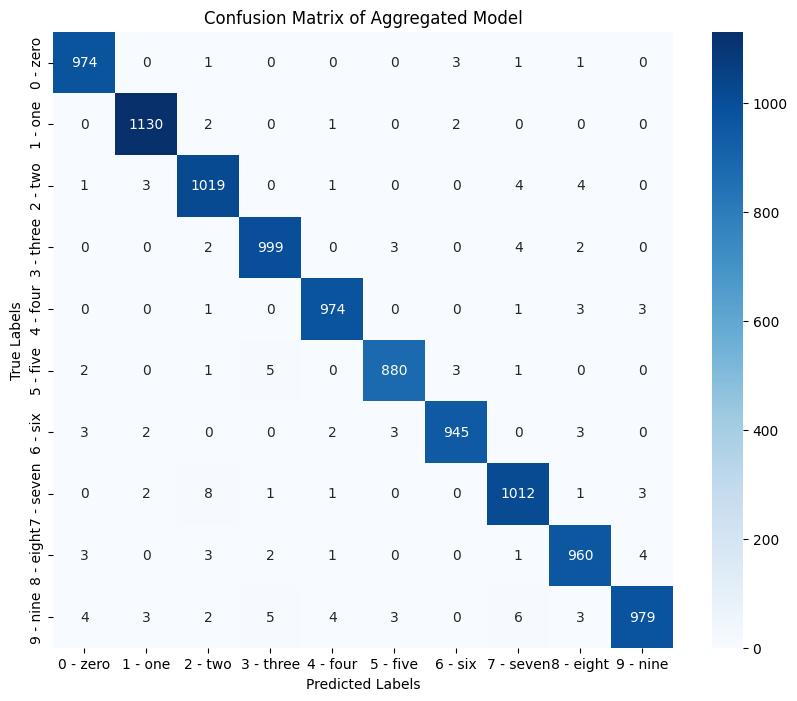

In [20]:
evaluate_aggregated_model(results, classes)